In [1]:
import pandas as pd

In [2]:
df_6_9 = pd.read_csv("./result/200601_200901_col_df.csv")
df_9_11 = pd.read_csv("./result/200901_201116_col_df.csv")

In [3]:
df_6_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         200 non-null    object 
 1   close_mean   200 non-null    float64
 2   volume_mean  200 non-null    float64
 3   kind         200 non-null    int64  
 4   kospi_kind   200 non-null    int64  
 5   eps          200 non-null    object 
 6   per          158 non-null    float64
 7   bps          200 non-null    object 
 8   pbr          200 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 14.2+ KB


In [4]:
df_9_11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         200 non-null    object 
 1   close_mean   200 non-null    float64
 2   volume_mean  200 non-null    float64
 3   kind         200 non-null    int64  
 4   kospi_kind   200 non-null    int64  
 5   eps          200 non-null    object 
 6   per          158 non-null    object 
 7   bps          200 non-null    object 
 8   pbr          200 non-null    float64
dtypes: float64(3), int64(2), object(4)
memory usage: 14.2+ KB


In [5]:
import math

def del_rest(val):
    return str(val).replace(',','')

def del_na_from_per(raw):
    if math.isnan(raw.per):
        return raw.close_mean / raw.eps_new
    else:
        return raw.per

def del_na_from_pbr(raw):
    if math.isnan(raw.pbr):
        return raw.close_mean / raw.bps_new
    else:
        return raw.pbr


df_6_9['eps_new'] = df_6_9['eps'].apply(del_rest).astype('float')
df_6_9['bps_new'] = df_6_9['bps'].apply(del_rest).astype('float')

df_9_11['eps_new'] = df_9_11['eps'].apply(del_rest).astype('float')
df_9_11['per'] = df_9_11['per'].apply(del_rest).astype('float')
df_9_11['bps_new'] = df_9_11['bps'].apply(del_rest).astype('float')

df_6_9.fillna(0, inplace=True)
df_9_11.fillna(0, inplace=True)

In [6]:
df_6_9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   code         200 non-null    object 
 1   close_mean   200 non-null    float64
 2   volume_mean  200 non-null    float64
 3   kind         200 non-null    int64  
 4   kospi_kind   200 non-null    int64  
 5   eps          200 non-null    object 
 6   per          200 non-null    float64
 7   bps          200 non-null    object 
 8   pbr          200 non-null    float64
 9   eps_new      200 non-null    float64
 10  bps_new      200 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 17.3+ KB


In [7]:
df_6_9.head()

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
0,A027410,4290.984848,1.502279e+05,21,7,111,21.59,"15,611",0.27,111.0,15611.0
1,A282330,134318.181818,4.267236e+04,16,7,"1,912",18.55,"35,933",3.87,1912.0,35933.0
2,A138930,5238.560606,1.349248e+06,21,6,531,3.12,"26,533",0.19,531.0,26533.0
3,A001040,86827.272727,9.240736e+04,21,7,770,16.77,"141,320",0.61,770.0,141320.0
4,A079160,20905.015152,5.248201e+05,26,11,"-5,963",0.00,726,28.18,-5963.0,726.0


In [8]:
df_9_11.head()

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
0,A027410,4212.735849,1.667225e+05,21,7,182,15.36,"15,772",0.26,182.0,15772.0
1,A282330,125330.188679,4.816287e+04,16,7,"2,980",16.31,"38,910",3.17,2980.0,38910.0
2,A138930,5428.113208,1.330164e+06,21,6,431,0.00,0,0.00,431.0,0.0
3,A001040,80815.094340,7.697700e+04,21,7,"1,773",13.49,"142,604",0.57,1773.0,142604.0
4,A079160,21969.811321,3.859889e+05,26,11,"-3,246",0.00,"3,923",5.72,-3246.0,3923.0


In [9]:
kind_dummy_6_9 = pd.get_dummies(df_6_9.kind, prefix="kind", dtype=float)
kospi_kind_dummy_6_9 = pd.get_dummies(df_6_9.kospi_kind, prefix="kospi_kind", dtype=float)

df_6_9_dummy = pd.concat([df_6_9, kind_dummy_6_9, kospi_kind_dummy_6_9], axis=1)


x_6_9 = df_6_9_dummy.drop(columns=['code','close_mean','volume_mean','kind','kospi_kind','eps','bps']).astype('float')
y_6_9 = df_6_9_dummy.close_mean.astype('float')

In [10]:
print(x_6_9.shape, y_6_9.shape)

x_6_9.info()

(200, 36) (200,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   per            200 non-null    float64
 1   pbr            200 non-null    float64
 2   eps_new        200 non-null    float64
 3   bps_new        200 non-null    float64
 4   kind_2         200 non-null    float64
 5   kind_3         200 non-null    float64
 6   kind_5         200 non-null    float64
 7   kind_6         200 non-null    float64
 8   kind_8         200 non-null    float64
 9   kind_9         200 non-null    float64
 10  kind_10        200 non-null    float64
 11  kind_11        200 non-null    float64
 12  kind_12        200 non-null    float64
 13  kind_13        200 non-null    float64
 14  kind_15        200 non-null    float64
 15  kind_16        200 non-null    float64
 16  kind_17        200 non-null    float64
 17  kind_18        200 non-null    float6

In [11]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
x_6_9_val = x_6_9.values
y_6_9_val = y_6_9.values

lin_fitter = LinearRegression()
lin_fitter.fit(x_6_9_val, y_6_9_val)

y_6_9_predict = lin_fitter.predict(x_6_9_val)

findfont: Font family ['NanumGothicOTF'] not found. Falling back to DejaVu Sans.


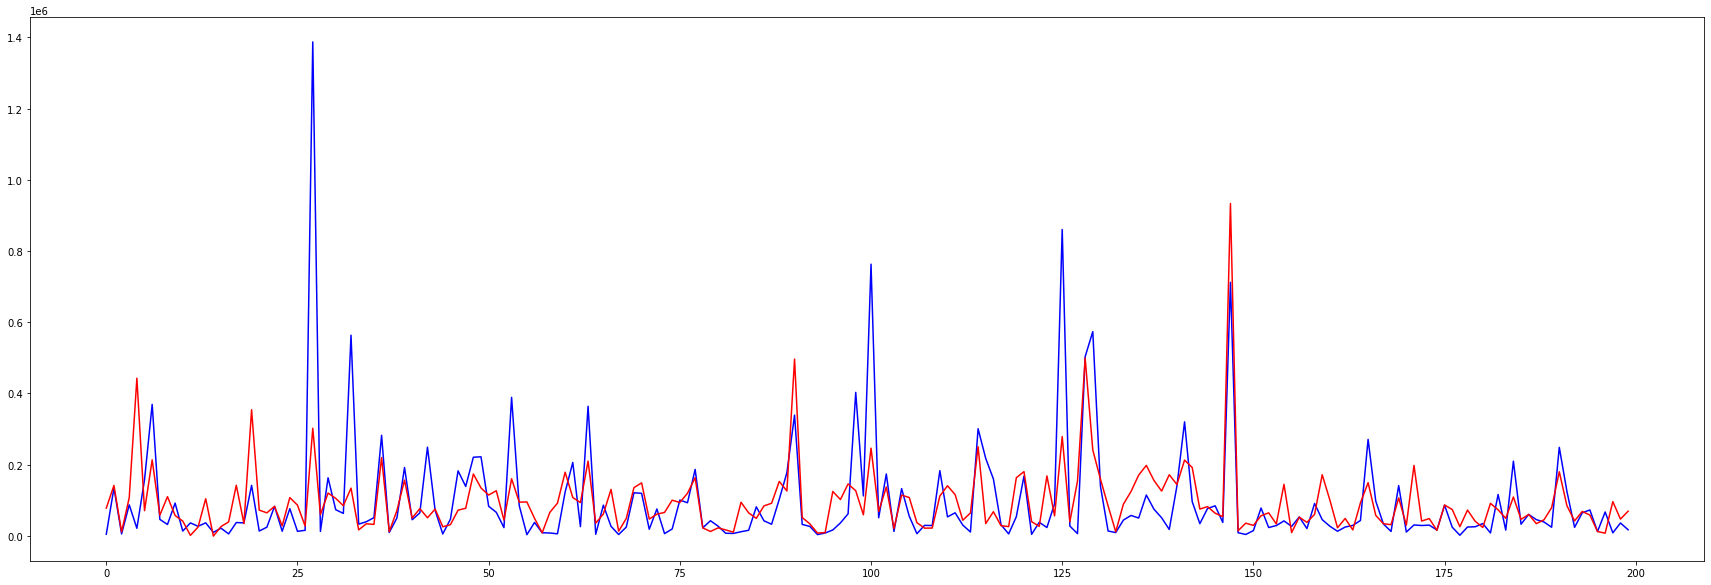

In [13]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_6_9_val)), y_6_9_val, color="b")
ax.plot(range(len(y_6_9_val)), y_6_9_predict, color="r")
plt.show()

In [14]:
coef_df = pd.DataFrame()
coef_df['name'] = x_6_9.columns.values
coef_df['coef'] = lin_fitter.coef_

pred_real = pd.DataFrame()
pred_real['code'] = df_6_9.code.values
pred_real['real'] = y_6_9_val
pred_real['pred'] = y_6_9_predict
pred_real['diff'] = y_6_9_val - y_6_9_predict

In [15]:
coef_df.sort_values(by='coef')

,name,coef
19,kind_20,-97455.795468
27,kospi_kind_3,-94866.098879
16,kind_17,-67916.864921
28,kospi_kind_4,-44019.876697
25,kospi_kind_1,-40133.744685
4,kind_2,-35178.354124
5,kind_3,-27816.387224
30,kospi_kind_6,-23282.470352
33,kospi_kind_9,-19539.969491
12,kind_12,-16216.057957


"미채용"CPC_KOSPI200_NONE= 0

"건설기계"CPC_KOSPI200_CONSTRUCTIONS_MACHINERY= 1

"조선운송"CPC_KOSPI200_SHIPBUILDING_TRANSPORTATION= 2

"철강소재"CPC_KOSPI200_STEELS_METERIALS= 3

"에너지화학"CPC_KOSPI200_ENERGY_CHEMICALS= 4

"정보통신"CPC_KOSPI200_IT= 5

"금융"CPC_KOSPI200_FINANCE= 6

"필수소비재"CPC_KOSPI200_CUSTOMER_STAPLES= 7

"자유소비재"CPC_KOSPI200_CUSTOMER_DISCRETIONARY= 8

In [16]:
df_6_9[df_6_9.kind==2]

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
22,A033780,82686.363636,441718.30303,2,7,"2,135",10.46,"68,202",1.15,2135.0,68202.0


In [17]:
pred_real_sorted = pred_real.sort_values(by=['diff'])
pred_real_sorted

,code,real,pred,diff
4,A079160,2.090502e+04,442722.103812,-4.218171e+05
147,A003240,7.119091e+05,933427.123414,-2.215180e+05
19,A002380,1.415379e+05,354063.721300,-2.125258e+05
171,A009420,3.036818e+04,197702.806302,-1.673346e+05
90,A002270,3.389167e+05,496287.062593,-1.573704e+05
...,...,...,...,...
129,A007310,5.735000e+05,240858.644396,3.326414e+05
32,A051910,5.634242e+05,133793.472192,4.296308e+05
100,A207940,7.630152e+05,246110.313173,5.169048e+05
125,A036570,8.604242e+05,278568.937580,5.818553e+05


## Polynominal

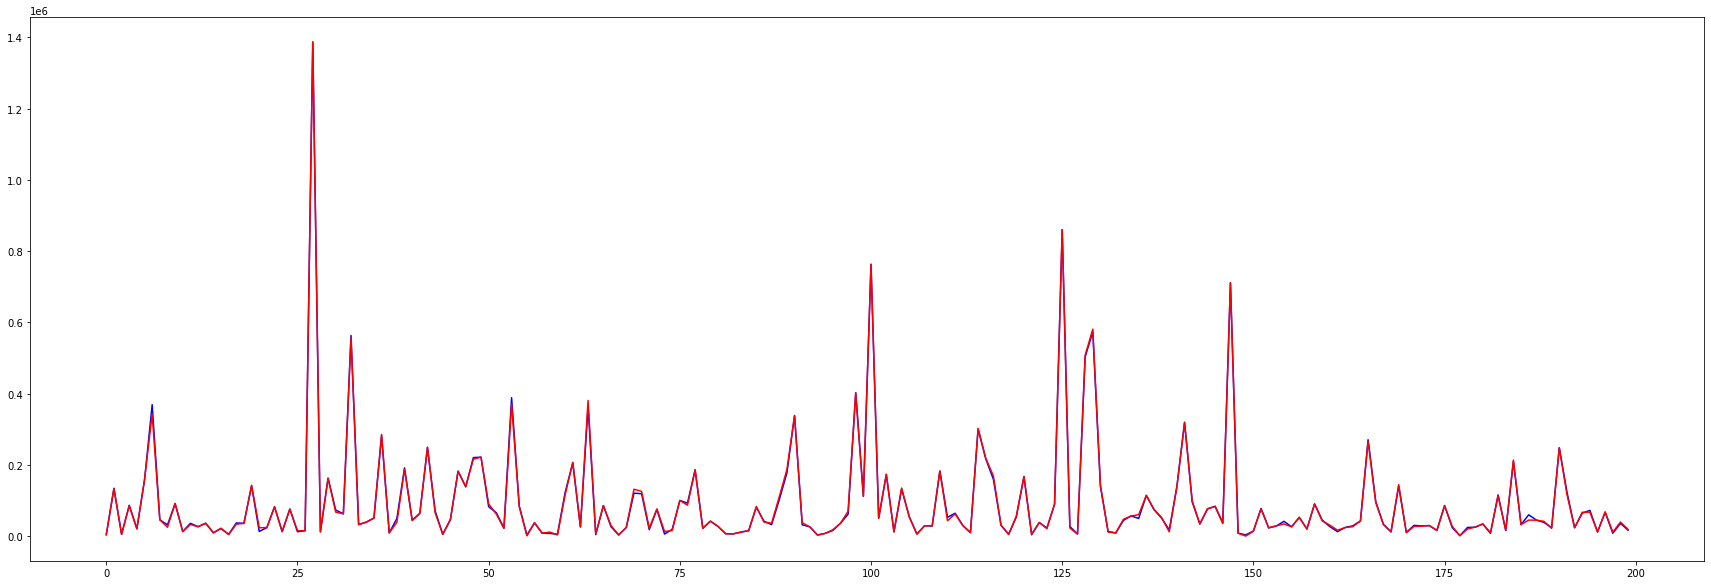

In [18]:
x_6_9_val = x_6_9.values
y_6_9_val = y_6_9.values

from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

x_6_9_val_poly = poly_reg.fit_transform(x_6_9_val)

lin_fitter = LinearRegression()
lin_fitter.fit(x_6_9_val_poly, y_6_9_val)

y_6_9_predict = lin_fitter.predict(x_6_9_val_poly)

fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_6_9_val)), y_6_9_val, color="b")
ax.plot(range(len(y_6_9_val)), y_6_9_predict, color="r")
plt.show()

In [19]:
pred_real = pd.DataFrame()
pred_real['code'] = df_6_9.code.values
pred_real['real'] = y_6_9_val
pred_real['pred'] = y_6_9_predict
pred_real['diff'] = y_6_9_val - y_6_9_predict

In [20]:
pred_real_sorted = pred_real.sort_values(by=['diff'])
pred_real_sorted

,code,real,pred,diff
63,A004370,363818.181818,381032.607589,-17214.425771
69,A069620,120780.303030,131789.381406,-11009.078376
135,A214320,49846.969697,60531.481878,-10684.512181
20,A016380,13321.212121,23809.959181,-10488.747060
89,A011170,177401.515152,186882.652406,-9481.137255
...,...,...,...,...
110,A145990,53048.484848,43389.636479,9658.848369
38,A010060,49815.909091,38758.477150,11057.431941
186,A069960,60057.575758,45253.444214,14804.131543
53,A010130,388734.848485,370739.150714,17995.697771


# Month 9 to 11.16

In [21]:
kind_dummy_9_11 = pd.get_dummies(df_9_11.kind, prefix="kind", dtype=float)
kospi_kind_dummy_9_11 = pd.get_dummies(df_9_11.kospi_kind, prefix="kospi_kind", dtype=float)

df_9_11_dummy = pd.concat([df_9_11, kind_dummy_9_11, kospi_kind_dummy_9_11], axis=1)

x_9_11 = df_9_11_dummy.drop(columns=['code','close_mean','volume_mean','kind','kospi_kind','eps','bps']).astype('float')
y_9_11 = df_9_11_dummy.close_mean.astype('float')

In [22]:
x_9_11_val = x_9_11.values
y_9_11_val = y_9_11.values

lin_fitter = LinearRegression()
lin_fitter.fit(x_9_11_val, y_9_11_val)

y_9_11_predict = lin_fitter.predict(x_9_11_val)

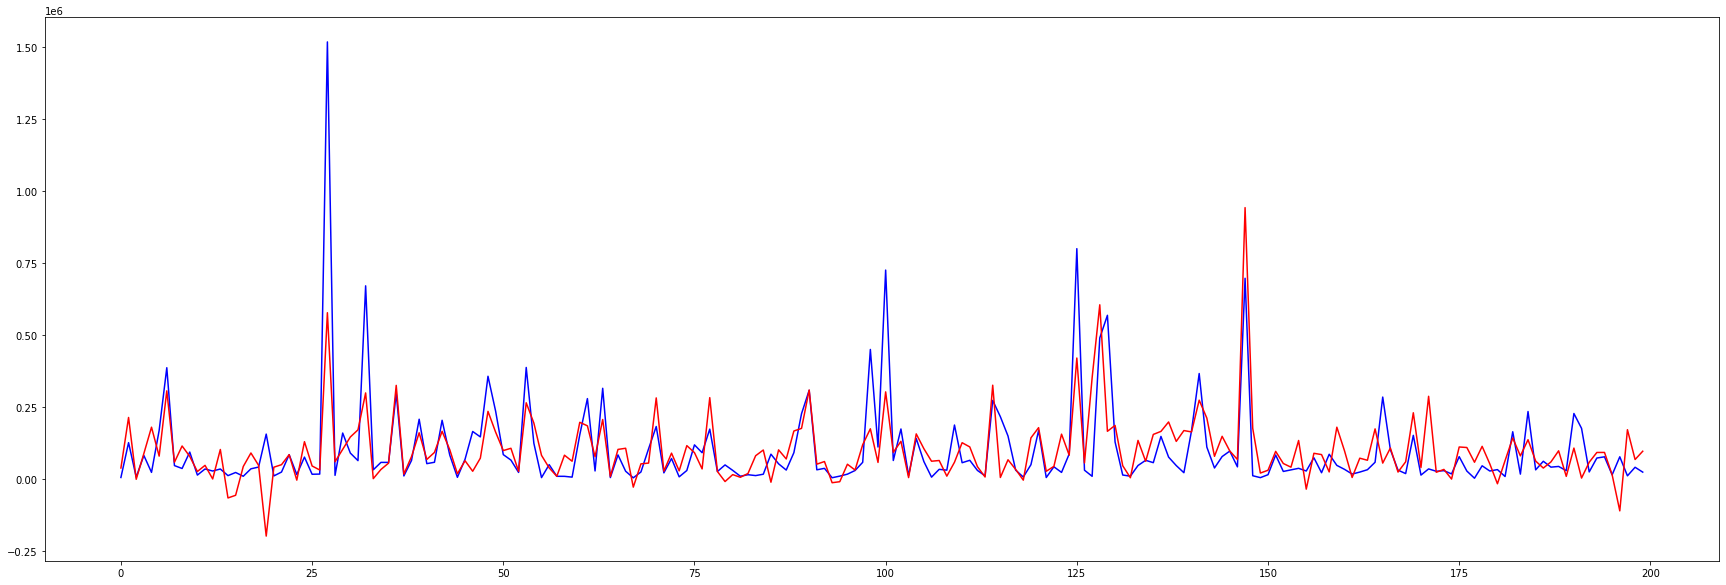

In [23]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_9_11_val)), y_9_11_val, color="b")
ax.plot(range(len(y_9_11_val)), y_9_11_predict, color="r")
plt.show()

In [24]:
coef_df = pd.DataFrame()
coef_df['name'] = x_9_11.columns.values
coef_df['coef'] = lin_fitter.coef_

pred_real = pd.DataFrame()
pred_real['code'] = df_9_11.code.values
pred_real['real'] = y_9_11_val
pred_real['pred'] = y_9_11_predict
pred_real['diff'] = y_9_11_val - y_9_11_predict

In [25]:
coef_df.sort_values(by='coef')

,name,coef
27,kospi_kind_3,-92070.494027
19,kind_20,-74979.544999
25,kospi_kind_1,-49038.441244
4,kind_2,-41254.552127
12,kind_12,-40577.508624
9,kind_9,-36028.409126
5,kind_3,-24719.728914
22,kind_24,-19837.466524
20,kind_21,-14649.868238
28,kospi_kind_4,-14330.205562


In [33]:
df_9_11[df_9_11.kind==18]

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
12,A006360,26667.924528,5.076524e+05,18,1,"1,208",6.32,"51,747",0.47,1208.0,51747.0
15,A294870,21568.867925,7.865461e+05,18,1,"-1,136",5.27,"40,352",0.53,-1136.0,40352.0
65,A000210,82690.566038,3.938290e+05,18,1,"5,278",4.10,"169,000",0.46,5278.0,169000.0
67,A047040,3040.377358,2.531644e+06,18,1,136,6.01,"6,438",0.43,136.0,6438.0
148,A009410,10287.735849,8.240207e+05,18,1,"8,105",1.28,"15,418",0.64,8105.0,15418.0
173,A051600,27926.415094,1.720062e+05,18,9,72,10.04,"22,983",1.18,72.0,22983.0
180,A000720,31626.415094,7.624341e+05,18,1,500,14.85,"60,646",0.50,500.0,60646.0


In [26]:
pred_real_sorted = pred_real.sort_values(by=['diff'])
pred_real_sorted

,code,real,pred,diff
127,A003520,8.320566e+03,350775.994728,-342455.428690
171,A009420,3.403113e+04,286481.287666,-252450.155590
147,A003240,6.968679e+05,942570.476811,-245702.552282
148,A009410,1.028774e+04,175345.883713,-165058.147864
197,A093370,9.975849e+03,170349.046589,-160373.197532
...,...,...,...,...
32,A051910,6.706038e+05,298227.980587,372375.792998
125,A036570,7.998491e+05,419544.865059,380304.191545
129,A007310,5.681321e+05,164852.454731,403279.620740
100,A207940,7.253774e+05,301892.459331,423484.899159


In [35]:
pred_real_sorted.iloc[:50]

,code,real,pred,diff
127,A003520,8320.566038,350775.994728,-342455.428690
171,A009420,34031.132075,286481.287666,-252450.155590
147,A003240,696867.924528,942570.476811,-245702.552282
148,A009410,10287.735849,175345.883713,-165058.147864
197,A093370,9975.849057,170349.046589,-160373.197532
4,A079160,21969.811321,179098.583510,-157128.772189
139,A030000,20760.377358,167346.147043,-146585.769685
123,A018250,21866.037736,154838.851776,-132972.814040
159,A161890,46277.358491,179061.533019,-132784.174528
137,A007570,75016.981132,197293.751641,-122276.770509


# Concat 6_9 & 9_11

In [43]:
x_6_9.columns.values == x_9_11.columns.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [37]:
x_9_11_val.shape

(200, 36)

In [38]:
x_6_9_val.shape

(200, 36)

In [46]:
import numpy as np

x_total_val = np.concatenate((x_6_9_val, x_9_11_val), axis=0)
y_total_val = np.concatenate((y_6_9_val, y_9_11_val), axis=0)

print(x_total_val.shape, y_total_val.shape)

lin_fitter = LinearRegression()
lin_fitter.fit(x_total_val, y_total_val)

y_total_val_predict = lin_fitter.predict(x_total_val)

(400, 36) (400,)


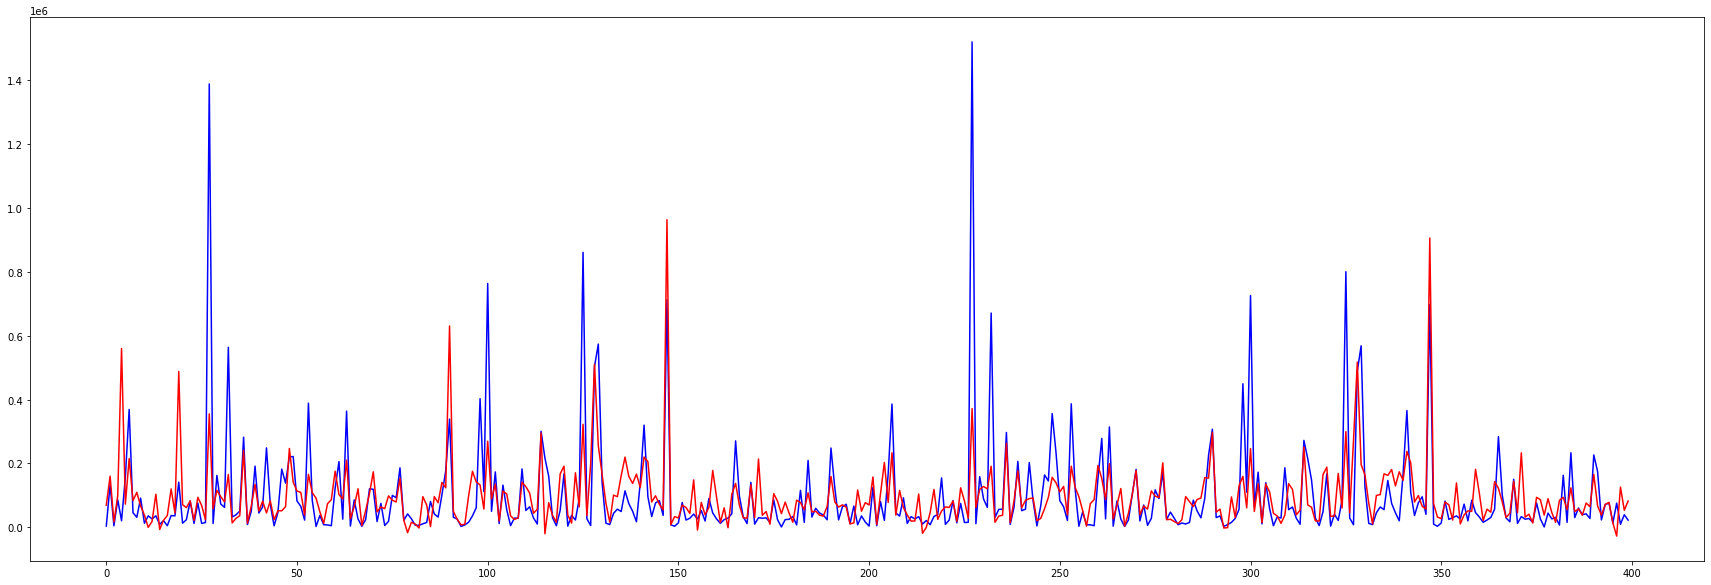

In [47]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,1,1)
ax.plot(range(len(y_total_val)), y_total_val, color="b")
ax.plot(range(len(y_total_val)), y_total_val_predict, color="r")
plt.show()

In [49]:
coef_df = pd.DataFrame()
coef_df['name'] = x_6_9.columns.values
coef_df['coef'] = lin_fitter.coef_

pred_real = pd.DataFrame()
pred_real['code'] = np.concatenate((df_6_9.code.values, df_9_11.code.values), axis=0)
pred_real['real'] = y_total_val
pred_real['pred'] = y_total_val_predict
pred_real['diff'] = y_total_val - y_total_val_predict

In [50]:
coef_df.sort_values(by='coef')

,name,coef
27,kospi_kind_3,-96886.324344
19,kind_20,-88752.955819
16,kind_17,-53042.520129
25,kospi_kind_1,-40211.306945
28,kospi_kind_4,-35605.775619
4,kind_2,-35413.325396
5,kind_3,-28349.202918
12,kind_12,-19678.230430
22,kind_24,-18536.348636
33,kospi_kind_9,-17511.665216


In [51]:
pred_real_sorted = pred_real.sort_values(by=['diff'])
pred_real_sorted

,code,real,pred,diff
4,A079160,2.090502e+04,559688.663087,-5.387836e+05
19,A002380,1.415379e+05,487765.089577,-3.462272e+05
90,A002270,3.389167e+05,630062.290059,-2.911456e+05
327,A003520,8.320566e+03,271579.207305,-2.632586e+05
147,A003240,7.119091e+05,962597.010330,-2.506879e+05
...,...,...,...,...
100,A207940,7.630152e+05,269530.907123,4.934842e+05
325,A036570,7.998491e+05,299480.163416,5.003689e+05
125,A036570,8.604242e+05,322606.357126,5.378179e+05
27,A051900,1.387424e+06,355174.689598,1.032250e+06


In [57]:
df_9_11[df_9_11.code=="A002270"]

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
90,A002270,307273.584906,2520.528302,5,7,"9,306",0.0,"839,847",0.36,9306.0,839847.0


In [54]:
df_9_11[df_9_11.kind==26]

,code,close_mean,volume_mean,kind,kospi_kind,eps,per,bps,pbr,eps_new,bps_new
4,A079160,21969.811321,3.859889e+05,26,11,"-3,246",0.00,"3,923",5.72,-3246.0,3923.0
10,A114090,12541.509434,4.451471e+05,26,8,-368,0.00,"8,420",1.47,-368.0,8420.0
36,A035420,297122.641509,8.311469e+05,26,11,"1,494",59.03,"44,439",6.67,1494.0,44439.0
46,A326030,164150.943396,4.278287e+05,26,10,0,0.00,0,0.00,0.0,0.0
52,A035250,21827.358491,6.781739e+05,26,8,-191,0.00,"16,215",1.33,-191.0,16215.0
60,A251270,152349.056604,7.396525e+05,26,11,976,67.25,"62,399",2.66,976.0,62399.0
62,A005250,26938.679245,1.390812e+06,26,10,472,22.03,"17,448",1.34,472.0,17448.0
64,A019680,3917.924528,2.130717e+05,26,8,-43,0.00,"6,609",0.59,-43.0,6609.0
72,A192080,70115.094340,1.201788e+05,26,8,"1,768",12.77,"40,763",1.83,1768.0,40763.0
79,A000150,47861.320755,1.295004e+05,26,9,-939,9.55,"93,908",0.50,-939.0,93908.0
